max. zonal wind:  4.3218129405152
max. zonal wind:  2.3410098977602907
max. zonal wind:  1.7542369787666015
max. zonal wind:  1.9124412639274226


KeyboardInterrupt: 

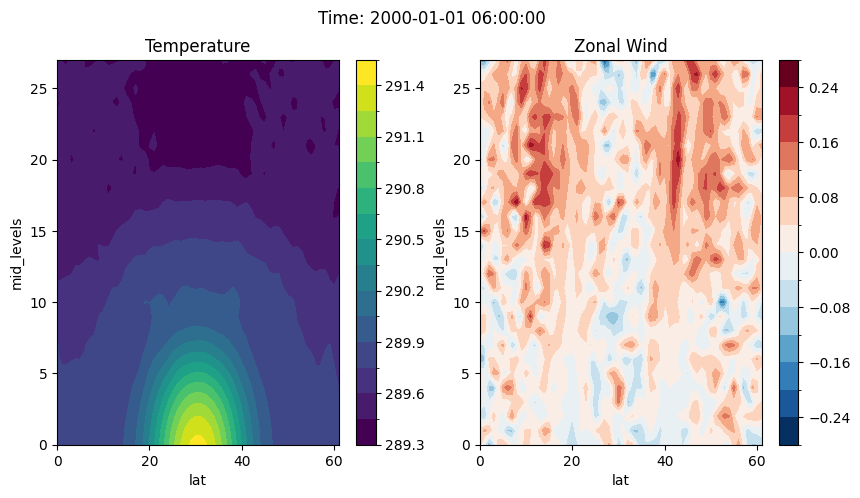

In [1]:
import climt
from sympl import PlotFunctionMonitor
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from gfs_dynamical_core import GFSDynamicalCore


def plot_function(fig, state):

    fig.set_size_inches(10, 5)

    ax = fig.add_subplot(1, 2, 1)
    state['air_temperature'].mean(dim='lon').plot.contourf(
        ax=ax, levels=16)
    ax.set_title('Temperature')

    ax = fig.add_subplot(1, 2, 2)
    state['eastward_wind'].mean(dim='lon').plot.contourf(
        ax=ax, levels=16)
    ax.set_title('Zonal Wind')

    plt.suptitle('Time: '+str(state['time']))


model_time_step = timedelta(seconds=600)
monitor = PlotFunctionMonitor(plot_function)

grid = climt.get_grid(nx=128, ny=62)

held_suarez = climt.HeldSuarez()
dycore = GFSDynamicalCore([held_suarez])
my_state = climt.get_default_state([dycore], grid_state=grid)

my_state['eastward_wind'].values[:] = np.random.randn(*my_state['eastward_wind'].shape)

for i in range(10000):
    diag, output = dycore(my_state, model_time_step)
    if (my_state['time'].hour % 2 == 0 and
            my_state['time'].minute == 0):
        print('max. zonal wind: ', np.amax(my_state['eastward_wind'].values))
        monitor.store(my_state)
    my_state.update(output)
    my_state['time'] += model_time_step